In [6]:
import pandas as pd

# Membaca file CSV yang diunggah pengguna
file_path = '/content/MaterialStrength.csv'
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama untuk memeriksa data
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,target_feature
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,0.300000,540.0,1.538462,1,0.350044,YEs,NO,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,0.300000,540.0,1.560651,1,0.452416,yES,nOO,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0.685714,475.0,1.569024,0,6.704743,yEs,NO,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0.685714,475.0,1.569024,0,8.891596,yes,NOO,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0.966767,331.0,1.185221,0,8.126411,YeS,no,44.30


**Insight :**
Dari data yang ditampilkan, terlihat bahwa dataset memiliki berbagai fitur numerik (x1 hingga x13) dan beberapa fitur kategorikal (x14, x15). Target target_feature adalah nilai kontinu, tetapi dapat dikonversi menjadi kategori untuk analisis klasifikasi.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Step 1: Pra-pemrosesan data
# Menghapus baris dengan nilai kosong (jika ada)
data.dropna(inplace=True)

# Label encoding untuk kolom kategorikal (jika ada)
label_encoder = LabelEncoder()
if data['x14'].dtype == 'object':
    data['x14'] = label_encoder.fit_transform(data['x14'].str.lower())

if data['x15'].dtype == 'object':
    data['x15'] = label_encoder.fit_transform(data['x15'].str.lower())

# Menentukan X (fitur) dan y (target)
X = data.drop(columns=['target_feature'])  # Menghapus target dari fitur
y = data['target_feature']

# Step 2: Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Normalisasi fitur (SVM sensitif terhadap skala data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Menghitung dan menerapkan normalisasi pada data latih
X_test = scaler.transform(X_test)  # Menerapkan normalisasi pada data uji

# Step 4: Membuat dan melatih model SVM Regression
svr_model = SVR(kernel='rbf')  # Menggunakan kernel RBF (Gaussian)
svr_model.fit(X_train, y_train)  # Melatih model

# Evaluasi model dengan data uji
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

mse  # Menampilkan Mean Squared Error (MSE) sebagai metrik performa

92.15427876459393

**Insight :**
Menunjukkan proses pelatihan model SVM Regression dengan kernel RBF menggunakan dataset yang telah dinormalisasi, di mana performa model diukur dengan Mean Squared Error (MSE) sebesar 92.15, menunjukkan tingkat kesalahan rata-rata kuadrat pada prediksi regresi.

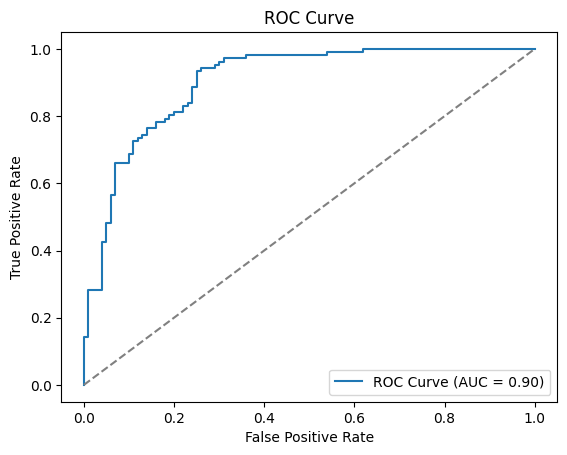

{'Akurasi': 0.7961165048543689,
 'Presisi': 0.872093023255814,
 'Recall': 0.7075471698113207,
 'F1-Score': 0.78125,
 'AUC': 0.9033018867924528}

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Mengubah target regresi menjadi kategori untuk klasifikasi (binarisasi)
# Membagi target menjadi dua kategori: rendah (< median) dan tinggi (>= median)
median_target = y.median()
y_class = (y >= median_target).astype(int)  # 1 untuk tinggi, 0 untuk rendah

# Membagi dataset lagi untuk klasifikasi
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Melatih model klasifikasi SVM
from sklearn.svm import SVC  # SVM untuk klasifikasi
clf_model = SVC(kernel='rbf', probability=True, random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

# Prediksi pada data uji
y_pred_clf = clf_model.predict(X_test_clf)
y_pred_proba = clf_model.predict_proba(X_test_clf)[:, 1]  # Probabilitas kelas positif

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)
roc_auc = roc_auc_score(y_test_clf, y_pred_proba)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_clf, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Menampilkan hasil evaluasi
{
    "Akurasi": accuracy,
    "Presisi": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC": roc_auc
}

**Insight :**
Model klasifikasi SVM menunjukkan performa yang solid dengan akurasi 79.61%, presisi 87.21%, recall 70.75%, F1-Score 78.12%, dan AUC 90.33%, seperti yang divisualisasikan pada ROC Curve yang mengindikasikan kemampuan model yang baik dalam membedakan kelas.